# Prediction of Absenteeism at work 

## Introduction

#### Problem statement:
Absenteeism is the absence of an employee from their workplace. Predicting the extent and frequency of the absenteeism of employees can be beneficial to companies and organisations in terms of <b>productivity and cost</b>.

#### What problem am I solving here?
The aim is predict the number of hours an employee is going to be absent and therefore the company or organization can perform necessary action to prevent the Absenteeism from affecting their productivity. 

#### About the Dataset
It
contains
<b>21</b>
Features,
one
of
them
being
<b>Absenteeism
time in
hours</b> Considered as 'Target'.
There are
740
data points
present
in
the
dataset.
The other Features are:

Individual
Identification
(ID),
Reason
for
absence
(a
categorical
variable
in
numerical
form,
one
number
denoting
each
of
the
28
possible
categories),
Month
of
absence,
Day
of
The
Week,
Seasons,
Transportation
Expense,
Distance
from
residence
to
work,
Service
Time,
Age,
Work
load
Average/day,
Hit
target
(achievement
of
periodic
goals
in
percentage),
Disciplinary
failure,
Education,
Son,
Social
Drinker,
Social
smoker,
Pet,
Weight,
Height
and
Body
Mass
Index.


#### Here is the link to dataset If anyone is interested : [https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work#]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv("Absenteeism_at_work.csv",delimiter=";")

## Checking if there are any  missing values in the data 

In [3]:
print(data.isnull().any())

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool




##  Dataset


In [4]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


 
 
 
 
 ## Description of the Dataset

I
worked
with
the
Absenteeism
at
work
data
set
from
the
UCI
Machine
Learning
Repository.
It
contains
<b>21</b>
attributes,
one
of
them
being
<b>Absenteeism
time in
hours.</b>
The
740
instances
present
in
the
dataset
are
sufficient
to
train
and
test
a
<b>
neural
network</b> 
that
predicts
the
absenteeism
of
a
given
employee
by
looking
at
their
data.
The
dataset
is
a
record
of
employees
absenteeism
from
a
courier
company
in
Brazil

In [5]:
data.describe('')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


##  Count of values in our target column

In [6]:
data['Absenteeism time in hours'].value_counts()


8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

#### Here we can notice that only 44 of 740 data points had '0' Hours in absenteesim. That would be 5.94% of workers who have never been absent from work.

# -------------------------------------------------------------------------------------------------------- 

## Encoding the 'Reason for absence' feature

I then considered <b>Analysis</b> and <b>Visualisation</b> of  <b>Reason for absence</b> Feature as this felt like a casual key factor for the absence.
<br>
<ul>
    
    <li>Fortunately, the data is already in the form of numerical values, so I dont have to convert from categorical value to numerical value.</li>
    <li>But, now the reason corresponding to the higher numerical value would affect the <b>Neural Network </b> more than the reason corresponding to the lower numerical value.</li>
    <li>But there is no such order in their importance. All the reasons have to be given equal importance by the network.</li>
    <li>Therefore, I used <b>'One Hot Encoding'</b> method to make sure the values doesn't affect the network.</li>
        
</ul>

In [7]:
reason=np.array(data['Reason for absence'])


In [8]:
nt=[]
for i in reason:
    op = [0 for i in range(1,30)]
    op[i-1] = 1
    nt.append(op)

### DataFrame of  'Reason for Absence' after encoding.
Ps: I've dropped 'rfa20' because 'reason 20' is never mentioned and has all values as '0'.
<br>
    rfa='Reason for Absence'

In [9]:
names = [f"rfa{i}" for i in range(1,30)]
reasons=pd.DataFrame(nt, columns=names)
reasons=reasons.drop("rfa20",axis=1)
target=pd.DataFrame(data['Absenteeism time in hours'])
reasons=pd.concat([reasons,target],axis=1)
reasons.head()

,rfa1,rfa2,rfa3,rfa4,rfa5,rfa6,rfa7,rfa8,rfa9,rfa10,...,rfa21,rfa22,rfa23,rfa24,rfa25,rfa26,rfa27,rfa28,rfa29,Absenteeism time in hours
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [10]:
data1=data.drop('Reason for absence',axis=1)

In [11]:
#pie chart for reasons for absence
c = []
for col in reasons.iloc[:,:-1]:
    i,j,*k = reasons[col].value_counts()
    c.append(j*100/740)

count=0
mydict = dict()
for col in reasons.iloc[:,:-1]:
    mydict[col] = []
    for i,val in enumerate(reasons[col]):
        if val==1:
            mydict[col].append(reasons.iloc[i,-1])

for key in mydict:
    mydict[key] = np.mean(mydict[key])

value_list=list(mydict.values())
v = np.array(value_list)
value_list = v * 100 / 120

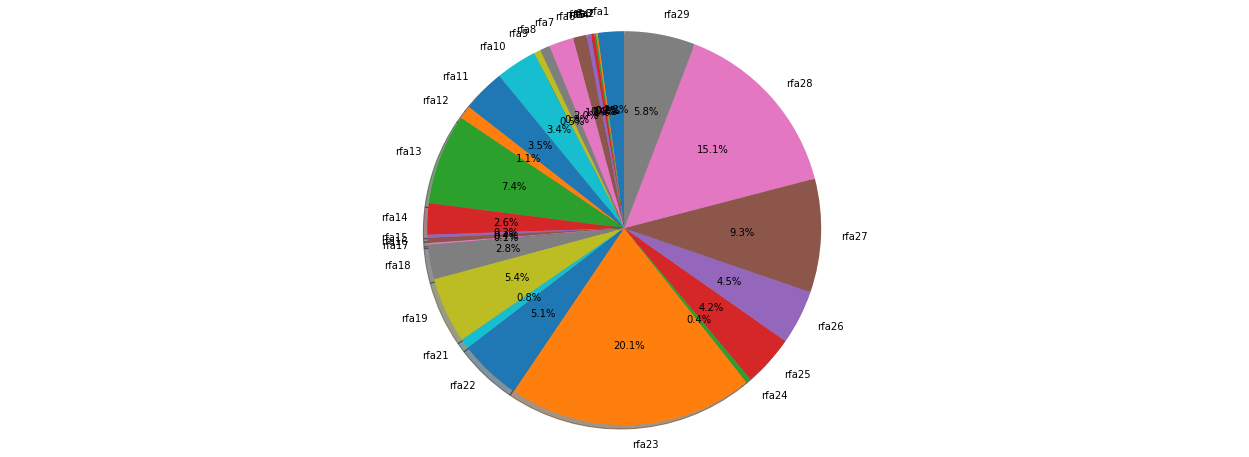

In [12]:
labels = list(reasons.columns.values)[:-1]
sizes = c


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

From the above pie chart we can deduce that Reason no 23 i.e <i>'Medical consultation'</i> has the highest frequency
and Reason no 28 i.e <i>dental consultation </i> is the second most given Reason

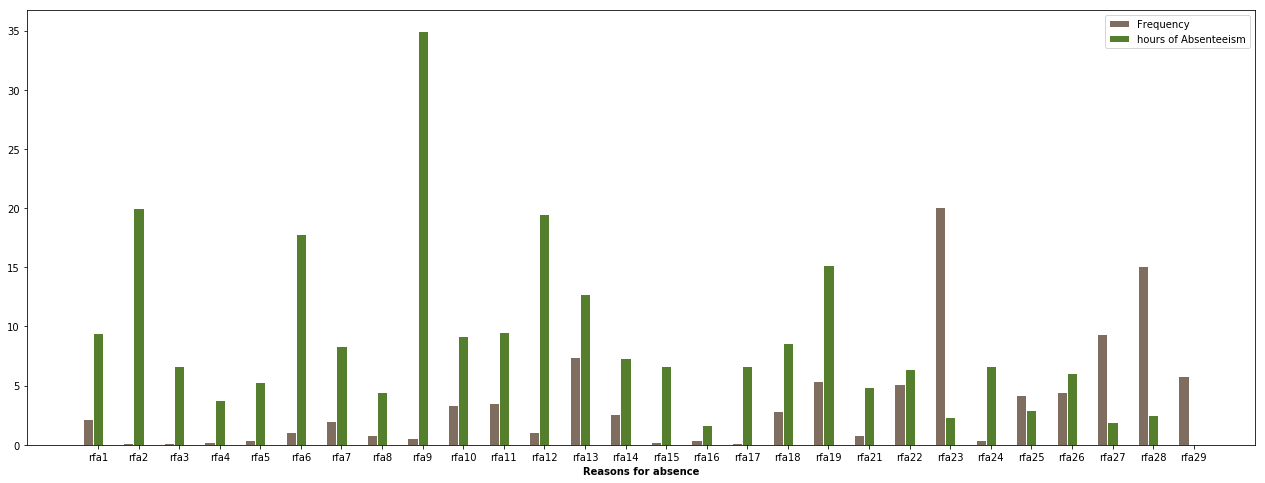

In [13]:
fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c
bars2 = value_list
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Frequency')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Reasons for absence', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

### I could draw a few important deductions from the above graph
<ul>
    <li>
        We can notice that even though <b>'rfa23'</b> is the reason with highest frequency, the number of hours employees are absent due to this reason is less.
    </li>
    <li>
        On the other hand <b>rfa9 i.e 'Diseases of the circulatory system' </b> is the reason with least frequency, but the number of hours employees are absent due to this reason is high. <u>Infact the highest amongst all othe reasons</u>.  
    </li> 
</ul>

### Few Actions that could be taken
  <ul>
    <li>Therefore by provoiding the meal with low-fat protein sources would not just decrease the disease of the circulatory system but also decrease the Absenteeism to a greater extent</li>
    <li>
            By having a onboard doctor for Medical consultation we can reduce the frequency of employees being absent for this reason.
    </li>
  </ul>

In [14]:
reasons=reasons.drop('Absenteeism time in hours',axis=1)

In [15]:
data_rfa_encoded=pd.concat([reasons,data1],axis=1)

##### Dataset after encoding the 'Reasons'

In [16]:
data_rfa_encoded.head()

,rfa1,rfa2,rfa3,rfa4,rfa5,rfa6,rfa7,rfa8,rfa9,rfa10,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,0,0,0,0,0,0,0,...,0,1,2,1,0,1,90,172,30,4
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,98,178,31,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,89,170,31,2
3,0,0,0,0,0,0,1,0,0,0,...,0,1,2,1,1,0,68,168,24,4
4,0,0,0,0,0,0,0,0,0,0,...,0,1,2,1,0,1,90,172,30,2


## -------------------------------------------------------------------------------------------------------- 

##  I selected ' Month of absence' Feature to check how it affects our 'Target' 
 - Fortunately the values are already in numerical forms based on their categorical values.</li>
 - I again had to use ' One hot Encoding ' method to make sure that these values don't affect the network.</li>
    

In [17]:
month=np.array(data['Month of absence'])
nt=[]
op=[0]*13
for i in month:
    op = [0 for i in range(13)]
    op[i]=1
    nt.append(op)
names = [f"month{i}" for i in range(13)]
months=pd.DataFrame(nt, columns=names)
months=pd.concat([months,target],axis=1)
months=months.drop('month0',axis=1)



#### DataFrame of 'Month of absence ' after encoding.


In [18]:
months.head()

,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,Absenteeism time in hours
0,0,0,0,0,0,0,1,0,0,0,0,0,4
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0,0,0,0,0,4
4,0,0,0,0,0,0,1,0,0,0,0,0,2


In [19]:
# pie chart for "MONTHS Of ABSENCE"
c1 = []
for col in months.iloc[:,:-1]:
    i,j,*k = months[col].value_counts()
    c1.append(j*100/740)
count=0
mydict1 = dict()
for col in months.iloc[:,:-1]:
    mydict1[col] = []
    for i,val in enumerate(months[col]):
        if val==1:
            mydict1[col].append(months.iloc[i,-1])
for key in mydict1:
    mydict1[key] = np.mean(mydict1[key])
    
value_list1=list(mydict1.values())
v1 = np.array(value_list1)
value_list1 = v1 * 100 / 120


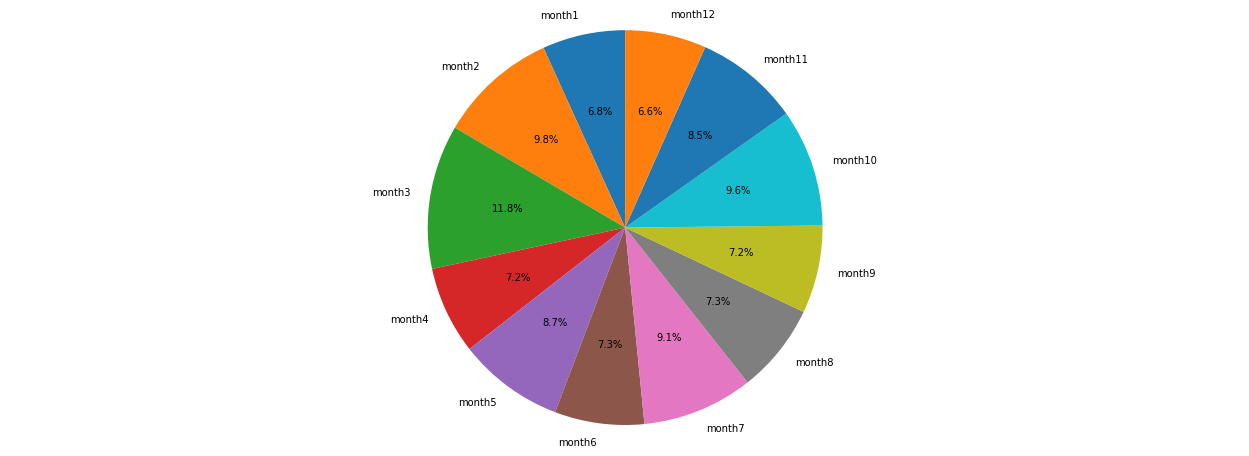

In [20]:
labels = list(months.columns.values)


labels = list(months.columns.values)[:-1]
sizes = c1


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### The frequency of Absenteeism is almost same in all the Months, with a little higher value in the month of MARCH and FEBRUARY as it is mid-summer across BRAZIL. 

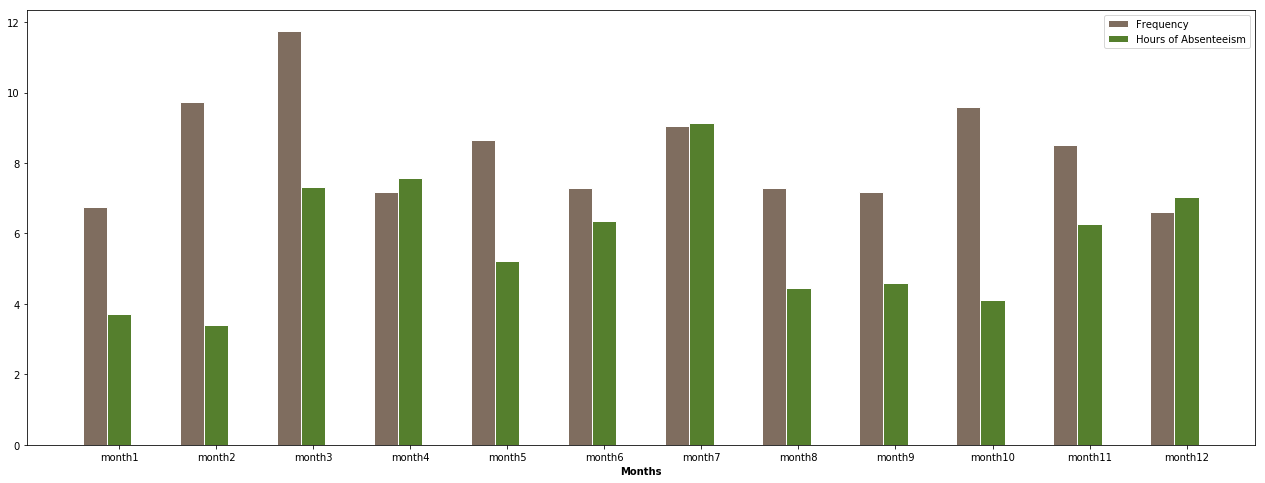

In [21]:
fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c1
bars2 = value_list1
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Frequency')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Months', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

<p>The Frequency of Absenteeism and number of hours employees are absent during these months are almost same with a very few exceptions.Like in the month of MARCH, though the frequency is high while the number of hours absent are low</p>

In [22]:
months=months.drop('Absenteeism time in hours',axis=1)

In [23]:
data2=data_rfa_encoded.drop('Month of absence',axis=1)

##### Dataset after encoding the 'Months of Absence'

In [24]:
data_months_encoded=pd.concat([months,data2],axis=1)
data_months_encoded.head()

,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,0,0,0,1,0,0,0,...,0,1,2,1,0,1,90,172,30,4
1,0,0,0,0,0,0,1,0,0,0,...,1,1,1,1,0,0,98,178,31,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,89,170,31,2
3,0,0,0,0,0,0,1,0,0,0,...,0,1,2,1,1,0,68,168,24,4
4,0,0,0,0,0,0,1,0,0,0,...,0,1,2,1,0,1,90,172,30,2


## -------------------------------------------------------------------------------------------------------- 

## Encoding and analysis of 'Day of the week' feature

#### I next considered this Feature as this also had categorical values in numerical form and hence required to be encoded 

In [25]:
day=np.array(data['Day of the week'])
nt=[]
op=[0]*7
for i in day:
    op = [0 for i in range(7)]
    op[i]=1
    nt.append(op)
names = [f"day{i-1}" for i in range(7)]
days=pd.DataFrame(nt,columns=names)
days=days.drop(['day-1','day0'],axis=1)
days=pd.concat([days,target],axis=1)

#### DataFrame of 'Day of the week ' after encoding.

In [80]:
days.head()

,day1,day2,day3,day4,day5,Absenteeism time in hours
0,0,1,0,0,0,4
1,0,1,0,0,0,0
2,0,0,1,0,0,2
3,0,0,0,1,0,4
4,0,0,0,1,0,2


In [81]:
# pie chart for "MONTHS Of ABSENCE"
c2 = []
for col in days.iloc[:,:-1]:
    i,j,*k = days[col].value_counts()
    c2.append(j*100/740)
    
count=0
mydict2 = dict()
for col in days.iloc[:,:-1]:
    mydict2[col] = []
    for i,val in enumerate(days[col]):
        if val==1:
            mydict2[col].append(days.iloc[i,-1])
for key in mydict2:
    mydict2[key] = np.mean(mydict2[key])


value_list2=list(mydict2.values())
v2 = np.array(value_list2)
value_list2 = v2 * 100 / 120.


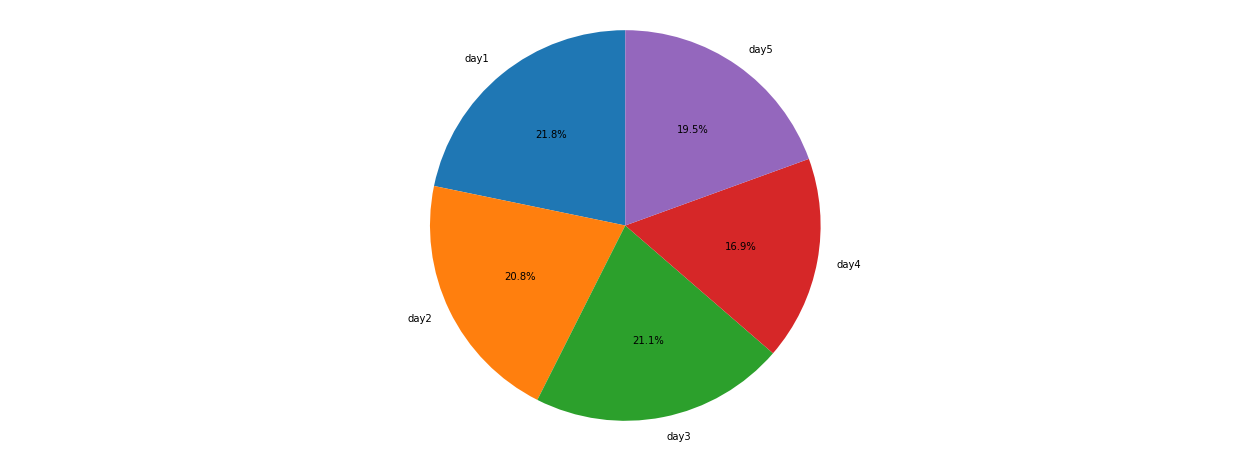

In [82]:
labels = list(days.columns.values)


labels = list(days.columns.values)[:-1]
sizes = c2


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
       startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

 On THURSDAYS the frequency of employees taking leave is  less while on MONDAYS and WEDNESDAYS they seem to be high.


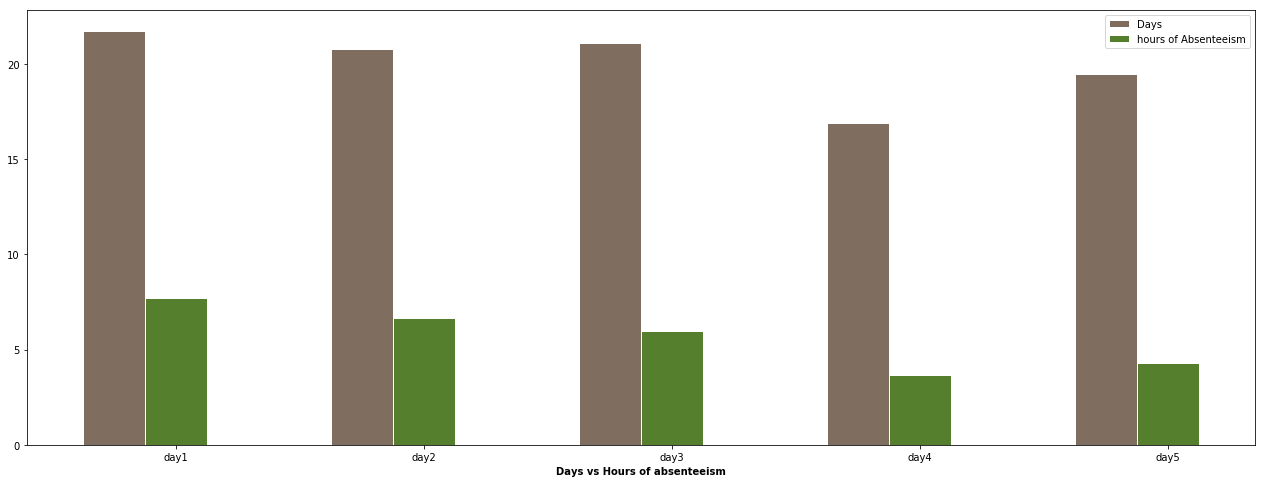

In [83]:

# x = np.arange(len(labels))
# values=[c,value_list]

# fig, ax = plt.subplots(figsize=(22,8))
# plt.bar(x, values)
# plt.xticks(x, labels)
# plt.show()

fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c2
bars2 = value_list2
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Days')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Days vs Hours of absenteeism', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

Though the frequency of Absenteeism is same on all the days , the number of hours employees are absent on mondays are higher.

In [84]:
data3=data_months_encoded.drop('Day of the week',axis=1)

In [31]:
data_days_encoded=pd.concat([days,data3],axis=1)
data_days_encoded=data_days_encoded.drop(['ID','Absenteeism time in hours'],axis=1)

## --------------------------------------------------------------------------------------------------------

## Encoding the 'Seasons' feature

#### I next considered this Feature as this also had categorical values in numerical form and hence required to be encoded 

In [32]:
season=np.array(data['Seasons'])
nt=[]
op=[0]*5
for i in season:
    op = [0 for i in range(5)]
    op[i]=1
    nt.append(op)
names = [f"season{i}" for i in range(5)]
seasons=pd.DataFrame(nt,columns=names)
data4=data_days_encoded.drop('Seasons',axis=1)
seasons=pd.concat([seasons,target],axis=1)

In [33]:
data_seasons_encoded=pd.concat([seasons,data4],axis=1)
data_seasons_encoded=data_seasons_encoded.drop('season0',axis=1)

In [34]:
seasons=seasons.drop('season0',axis=1)

In [35]:
c3 = []
for col in seasons.iloc[:,:-1]:
    i,j,*k = seasons[col].value_counts()
    c3.append(j*100/740)
count=0
mydict3 = dict()
for col in seasons.iloc[:,:-1]:
    mydict3[col] = []
    for i,val in enumerate(seasons[col]):
        if val==1:
            mydict3[col].append(seasons.iloc[i,-1])
for key in mydict3:
    mydict3[key] = np.mean(mydict3[key])


value_list3=list(mydict3.values())
v3 = np.array(value_list3)
value_list3 = v3 * 100 / 120.

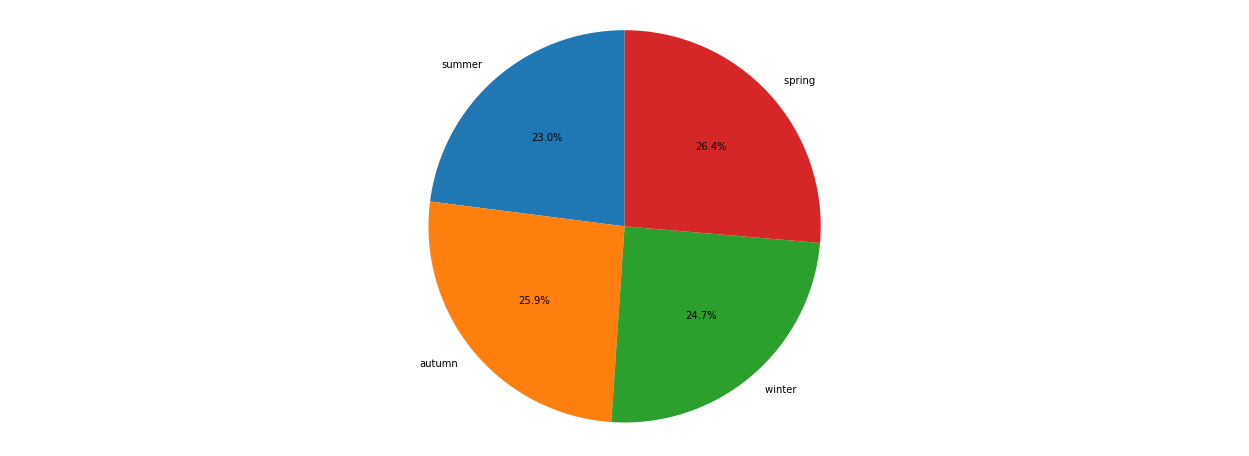

In [36]:

labels = ['summer','autumn','winter ','spring ']
sizes = c3


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

All the seasons are equally contributinng to our target. There is no fine line between them where we can conclude with a higher or lower frequency of absenteesim of employees

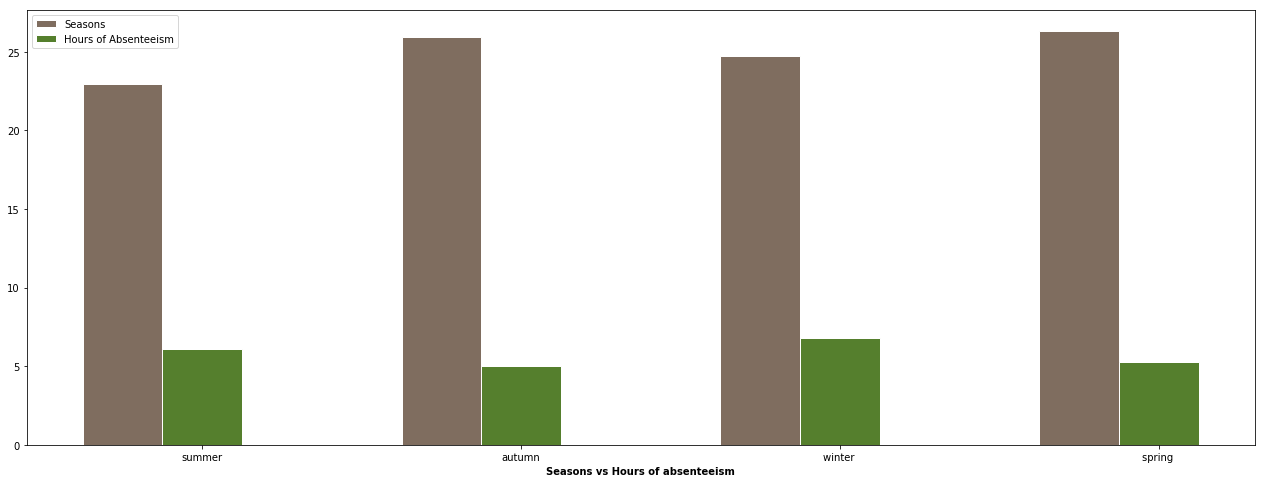

In [37]:

fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c3
bars2 = value_list3
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Seasons')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Seasons vs Hours of absenteeism', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

#### All the seasons are almost equally contributing .Therefore we can drop "Seasons" from the dataset, as it wouldnt affect our network to greater extent

In [85]:
final_data=data_days_encoded.drop('Seasons',axis=1)


## -------------------------------------------------------------------------------------------------------- 

## How 'Education' of the employee affect Absenteeism



In [39]:
education=pd.DataFrame(data['Education'])
education=pd.concat([education,target],axis=1)


In [40]:
mydict4=dict()
mydict5=dict()
c4=[]
for col in education.iloc[:,:-1]:
    for i in (education[col].value_counts()):
        c4.append(i*100/740)
    
    
for i in range(4):
    mydict4[i+1]=[]
    
for i,val in enumerate(education['Education']):
    mydict4[val].append(education.iloc[i,-1])
    

for key in mydict4:
    mydict4[key] = np.mean(mydict4[key])

value_list4=list(mydict4.values())
v4 = np.array(value_list4)
value_list4 = v4 * 100 / 120.

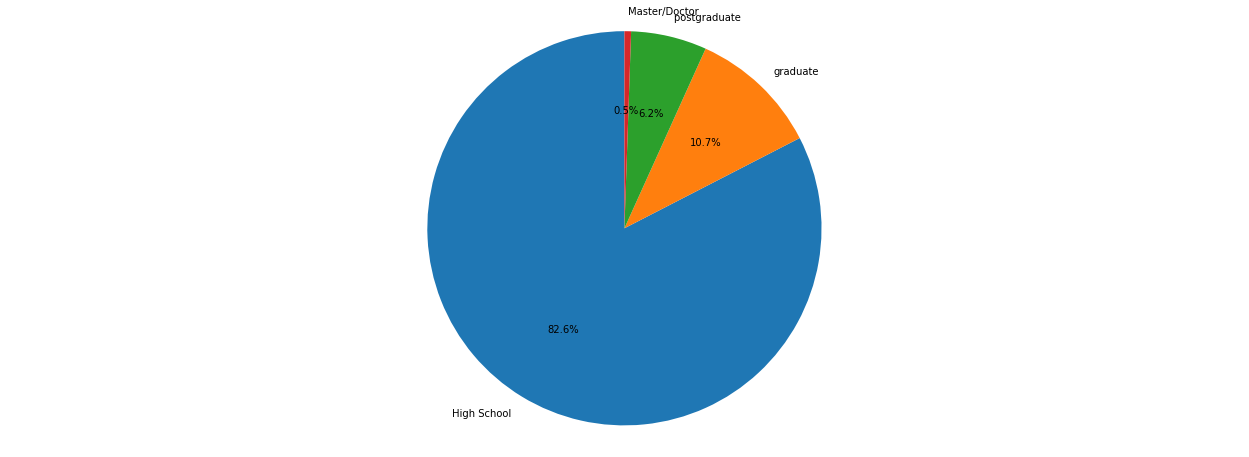

In [41]:
labels = ['High School','graduate','postgraduate ','Master/Doctor']
sizes = c4


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

It is obvious for a COURIOR COMPANY to have lots of employees with HIGH SCHOOL qualification as DELIVERY EXECUTIVES.
And comparitively less number of graduates and higher qualification holders

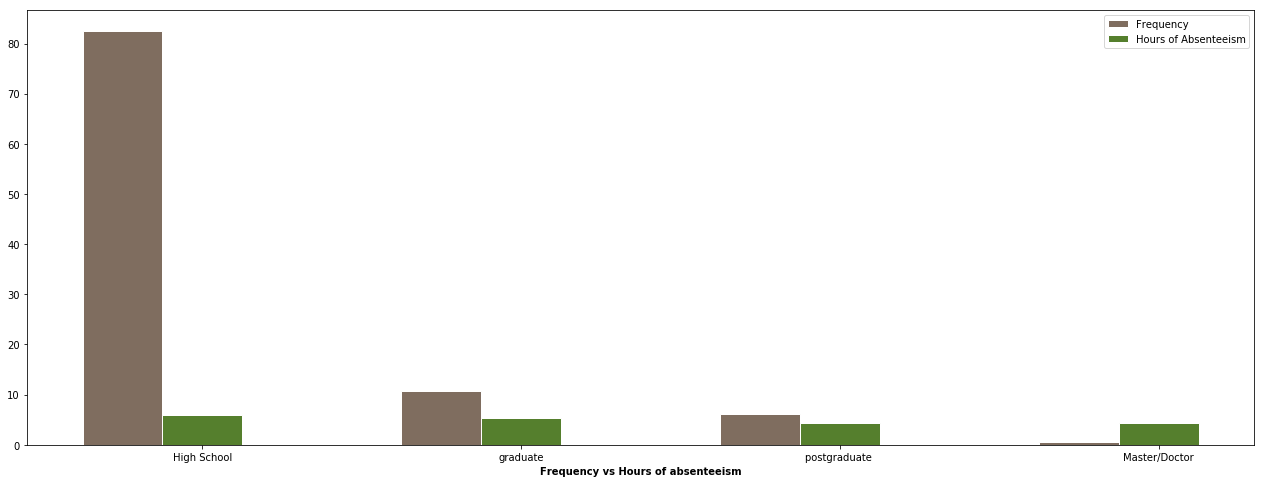

In [42]:
labels = ['High School','graduate','postgraduate ','Master/Doctor']
# x = np.arange(len(labels))
# values=[c,value_list]

# fig, ax = plt.subplots(figsize=(22,8))
# plt.bar(x, values)
# plt.xticks(x, labels)
# plt.show()

fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c4
bars2 = value_list4
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Frequency')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Frequency vs Hours of absenteeism', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

The number of hours these employees are taking leave is alomst same, considering whatever their qualifications Is.

## -------------------------------------------------------------------------------------------------------- 

## How 'no. of sons' affect Absenteeism
 By analysing this feature we can understand how families affect employees absenteeism

In [87]:
print(data['Son'].value_counts())

0    298
1    229
2    156
4     42
3     15
Name: Son, dtype: int64




This shows the number of children of each worker


In [88]:
sons=pd.DataFrame(data['Son'])
sons=pd.concat([sons,target],axis=1)
sons.head()

,Son,Absenteeism time in hours
0,2,4
1,1,0
2,0,2
3,2,4
4,2,2


In [89]:

mydict5=dict()
c5=[]
for col in sons.iloc[:,:-1]:
    for i in (sons[col].value_counts()):
        c5.append(i*100/740)
    
    
for i in range(5):
    mydict5[i]=[]
    
for i,val in enumerate(sons['Son']):
    mydict5[val].append(sons.iloc[i,-1])
    

for key in mydict5:
    mydict5[key] = np.mean(mydict5[key])

value_list5=list(mydict5.values())
v5 = np.array(value_list5)
value_list5 = v5 * 100 / 120.

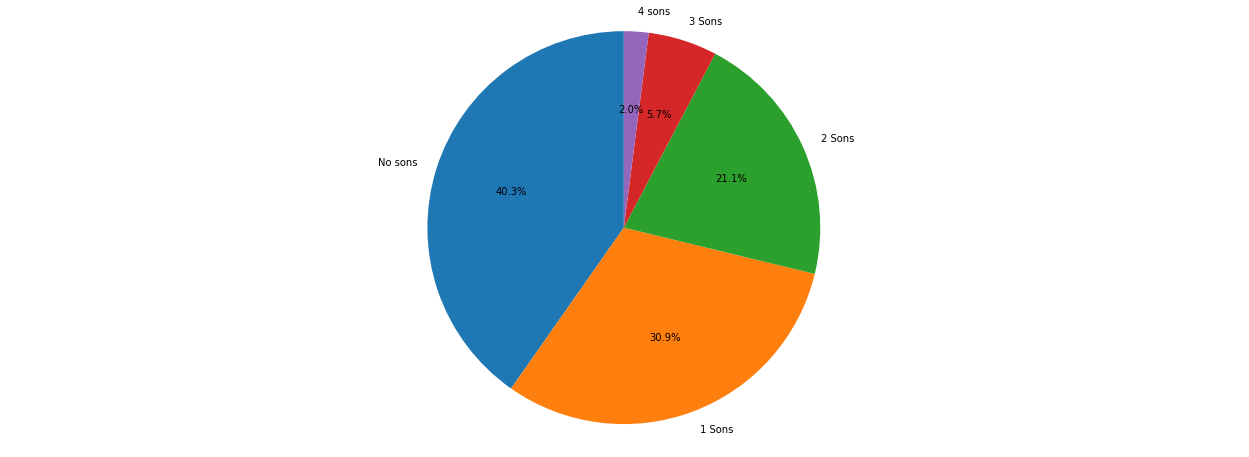

In [90]:

labels = ['No sons','1 Sons','2 Sons','3 Sons','4 sons']
sizes = c5


fig1, ax1 = plt.subplots(figsize=(22,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

40% of their employees have no sons and 31% of them have a single child. Therefore if u have one or no sons you are more likely to be absent.

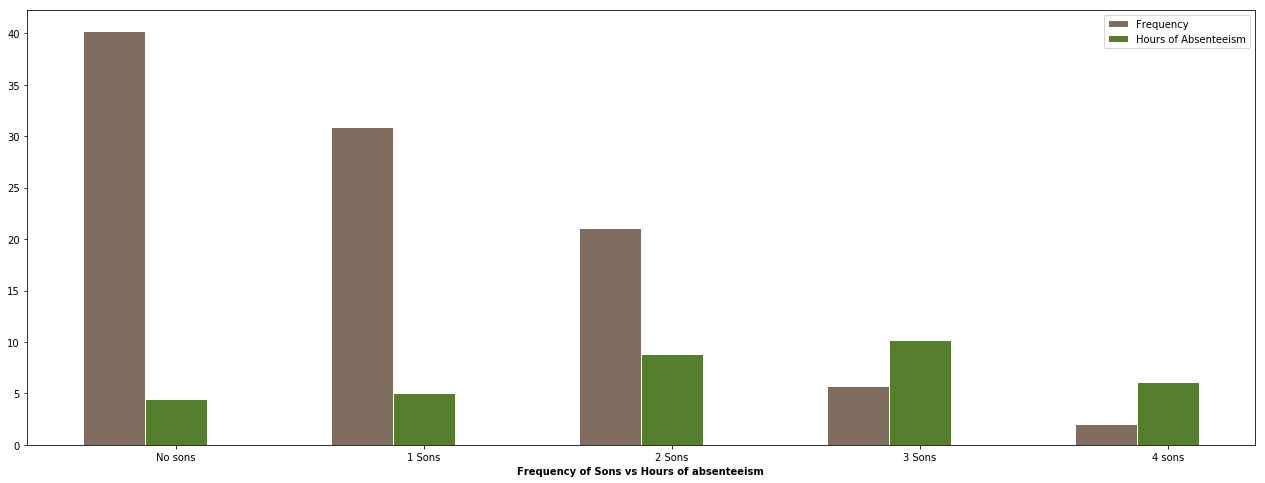

In [47]:
labels = ['No sons','1 Sons','2 Sons','3 Sons','4 sons']
# x = np.arange(len(labels))
# values=[c,value_list]

# fig, ax = plt.subplots(figsize=(22,8))
# plt.bar(x, values)
# plt.xticks(x, labels)
# plt.show()

fig, ax = plt.subplots(figsize=(22,8))

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = c5
bars2 = value_list5
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
ax.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Frequency')
ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Hours of Absenteeism')
 
# Add xticks on the middle of the group bars
plt.xlabel('Frequency of Sons vs Hours of absenteeism', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], labels)
 
# Create legend & Show graphic
plt.legend()
plt.show()

The Employees with no sons and a single son take lesser hours of leave when compared to employees having 2 & 3 sons.
If u have more than 2 sons you are less likely to be absent at work but when u are absent you are likely to be absent for longer hours

# -------------------------------------------------------------------------------------------------------

We can drop "service time" from the dataset as no Description about that feature is given.

In [48]:
 final_data=final_data.drop('Service time',axis=1)

# -------------------------------------------------------------------------------------------------------

In [49]:
final_data=pd.concat([final_data,target],axis=1)

## Distance from residence to work
    Lets see how distance to work affects our target

In [50]:
dist = data.groupby('Distance from Residence to Work')

In [51]:
dist['Absenteeism time in hours'].count()

Distance from Residence to Work
5       6
10     55
11     26
12     29
13     34
14      9
15      9
16     26
17     15
20     19
22     20
25     54
26    128
27      7
29     14
31     37
35      2
36     40
42      7
45      1
48      5
49      8
50     45
51    120
52     24
Name: Absenteeism time in hours, dtype: int64

In [52]:
distance=pd.DataFrame(data['Distance from Residence to Work'])
distance=pd.concat([distance,target],axis=1)


In [53]:
distance=distance.sort_values('Distance from Residence to Work').reset_index().drop('index',axis=1)

Data after sorting based on distance to work

In [92]:
distance.head(10)

,Distance from Residence to Work,Absenteeism time in hours
0,5,0
1,5,8
2,5,4
3,5,0
4,5,2
5,5,16
6,10,2
7,10,3
8,10,56
9,10,64


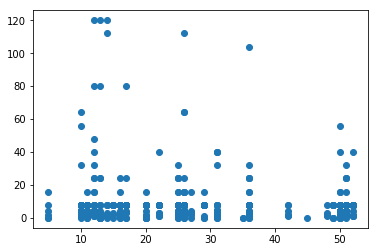

In [55]:

plt.scatter(list(distance['Distance from Residence to Work']),list(distance['Absenteeism time in hours']))

- We can conclude that a lot of employees stay at 10-20 kms distance from work and also have the record of being absent for a highest number of hours.
- Few employees also stay at a distance of 50+ kms and also have a record of being absent for longer hours. By provoiding these employees a residance somewhere near the workplace we can probably decrease frequency of them being absent

## -------------------------------------------------------------------------------------------------------- 

  ## I will continue doing Data visualization for the rest of the features. Feel free to work on this and add on to my research

### This is how the data finally looks before training the model

In [93]:
final_data.head(10)

,day1,day2,day3,day4,day5,month1,month2,month3,month4,month5,...,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0,1,0,0,0,0,0,0,0,0,...,97,0,1,2,1,0,1,90,172,30
1,0,1,0,0,0,0,0,0,0,0,...,97,1,1,1,1,0,0,98,178,31
2,0,0,1,0,0,0,0,0,0,0,...,97,0,1,0,1,0,0,89,170,31
3,0,0,0,1,0,0,0,0,0,0,...,97,0,1,2,1,1,0,68,168,24
4,0,0,0,1,0,0,0,0,0,0,...,97,0,1,2,1,0,1,90,172,30
5,0,0,0,0,1,0,0,0,0,0,...,97,0,1,0,1,0,0,89,170,31
6,0,0,0,0,1,0,0,0,0,0,...,97,0,1,1,1,0,4,80,172,27
7,0,0,0,0,1,0,0,0,0,0,...,97,0,1,4,1,0,0,65,168,23
8,1,0,0,0,0,0,0,0,0,0,...,97,0,1,2,1,0,0,95,196,25
9,1,0,0,0,0,0,0,0,0,0,...,97,0,3,1,0,0,1,88,172,29


# Training the model

In [94]:
import tensorflow as tf
from tensorflow.python import keras

### Normalising data

In [59]:

# Normalizing all Data Points
final_data=np.array(final_data)
final_data = (final_data - final_data.min()) / (final_data.max() - final_data.min())

# Picking all columns other than the last one as X
X = np.array(final_data[:,:-1])

# And the last one as Y
Y = np.array(final_data[:,-1])



In [60]:
from sklearn.decomposition import PCA
pca= PCA(n_components=33)
x=pca.fit_transform(X)

 Split the data into respective test and train

In [61]:

xtrain, xtest, ytrain, ytest = train_test_split(x,Y, test_size=0.2)

Defining the network

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(37,input_shape=(xtrain[0].shape), activation=tf.nn.tanh,  kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

In [63]:
model.compile(loss='mse',optimizer=keras.optimizers.Adam(0.001),metrics=['mae'])

Training the model

In [72]:
history=model.fit(xtrain,ytrain,epochs=10,verbose=2)

Epoch 1/10
 - 0s - loss: 0.0356 - mean_absolute_error: 0.0140
Epoch 2/10
 - 0s - loss: 0.0279 - mean_absolute_error: 0.0145
Epoch 3/10
 - 0s - loss: 0.0218 - mean_absolute_error: 0.0145
Epoch 4/10
 - 0s - loss: 0.0169 - mean_absolute_error: 0.0142
Epoch 5/10
 - 0s - loss: 0.0132 - mean_absolute_error: 0.0142
Epoch 6/10
 - 0s - loss: 0.0102 - mean_absolute_error: 0.0145
Epoch 7/10
 - 0s - loss: 0.0079 - mean_absolute_error: 0.0141
Epoch 8/10
 - 0s - loss: 0.0062 - mean_absolute_error: 0.0146
Epoch 9/10
 - 0s - loss: 0.0048 - mean_absolute_error: 0.0142
Epoch 10/10
 - 0s - loss: 0.0038 - mean_absolute_error: 0.0143


Plotting the loss curve

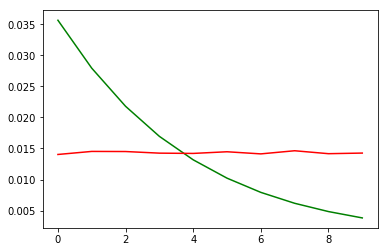

In [73]:
plt.plot(history.epoch,history.history['loss'],'g')
plt.plot(history.epoch,history.history['mean_absolute_error'],'r')

## Model Efficency

|  MSE  |  MAE  |
|-------|-------|
| 0.0038| 0.0143|

## Testing the model

In [74]:
model.evaluate(xtest,ytest)

148/148 [==============================] - ETA:  - 0s 40us/step


[0.004455100644279171, 0.01752390037920024]

In [75]:
z = model.predict(xtrain[:5])

In [77]:
yt = ytrain[:5].reshape(5,1)

In [78]:
m = np.subtract(z,yt)

This is the mean_absolute_error for test data of five rows

In [79]:
m.mean()

0.003973946278703582